# Entrance Challenge: When Will the Sakura Bloom?

***

**Name：Md. Mesbahur Rahman**

**Submission Date：**

***

# 0. Basics of the Sakura Bloom-cycle (5pts total)

In a year, sakura trees basically go through 4 phases: energy production, hibernation, growth, and of course flowering. These phases
roughly follow the seasons, but not exactly. <br>

   Production phase： Initial development of the buds（Summer-Fall） <br>
   Hibernation phase： Bud growth stops while the tree goes into hibernation（Late Fall-Winter） <br>
   Growth phase： Buds once again continue to grow when the tree comes out of its winter hibernation（Late Winter-Spring） <br>
   Flowering phase： The buds finally bloom in spring (as climate conditions allow), once they have been able to fully develop.（Spring） <br>
    
Each year, near the end of winter but before the trees finally bloom, the hibernation period ends. The sakura that rested through the winter once gain become metabolically active, and the buds continue to grow (though we may not immediately notice when this happens.) However, the cycle is not simply clockwork- for example, in places where the temperature is above 20℃ year-round, the trees are unable to hibernate sufficiently, and thus cannot blossom.
    
In this challenge, we have outlined the basic mechanism by which the sakura reach their eventual bloom-date. We consider building a bloom-date prediction model for the case of sakura in Tokyo, with the data split as follows: <br>
    
Test years： 1966, 1971, 1985, 1994, and 2008 <br>
Training years: 1961 to 2017 (Excluding the test years) <br>
    
You should fit the model to the data from the training years, then use the model to predict the bloom-date for each of the test years. The 3 models to be applied to the data are described below.
    


### Problem 0-1: (5pts)
Acquire data of sakura blooming date (桜の開花日) for Tokyo from 1961 to 2017 using the Japanese Meteorological Agency website (気象庁).

In [17]:
import pandas as pd
df=pd.read_csv("modified tokyo.csv")
df

,serial,year,month,day,local pressure,sea pressure,total preci,hr1 preci,min10 preci,avg temp,max temp,min temp,avg humid,min humid,sun hours,bloom
0,0,1961,1,1,1011.7,1012.4,0.0,0.0,0.0,2.1,7.9,-3.9,41,15,8.6,0
1,1,1961,1,2,1020.2,1021.0,0.0,0.0,0.0,1.5,9.2,-3.3,51,26,8.7,0
2,2,1961,1,3,1021.3,1022.1,0.1,0.8,0.0,2.5,7.3,-2.4,58,37,5.4,0
3,3,1961,1,4,1004.6,1005.3,20.2,13.9,3.2,4.7,11.5,0.6,60,38,1.0,0
4,4,1961,1,5,1016.3,1017.0,0.0,0.0,0.0,3.8,7.7,1.4,33,19,8.3,0
5,5,1961,1,6,1014.0,1014.7,0.0,0.0,0.0,3.9,8.6,-0.2,54,35,1.4,0
6,6,1961,1,7,1018.5,1019.3,0.0,0.0,0.0,3.3,9.1,-0.8,50,28,8.2,0
7,7,1961,1,8,1022.7,1023.4,0.3,0.2,0.1,4.0,11.8,-2.0,60,25,7.9,0
8,8,1961,1,9,1020.2,1020.9,7.4,2.8,0.9,4.7,6.9,1.8,69,50,0.0,0
9,9,1961,1,10,1014.9,1015.6,2.3,0.8,0.2,5.3,6.4,3.5,79,72,0.0,0


***
## 1. Prediction using the "600 Degree Rule" (15pts total)

For a rough approximaton of the bloom-date, we start with a simple "rule-based" prediction model, called the "600 Degree Rule". The rule consists of logging the maximum temperature of each day, starting  on February 1st, and sum these temperatures until the sum surpasses 600$^\circ$C. The day that this happens is the predicted bloom-date. This 600$^\circ$C threshold is used to easily predict bloom-date in various locations varies by location. However, for more precise predictions, it should be set differently for every location. In this challenge, we verify the accuracy of the "600 Degree Rule" in the case of Tokyo.

### Problem 1-1: (5pts)
From here-on, we refer to the bloom-date in a given year $j$ as $BD_{j}$. For each year in the training data, calculate the accumulated daily maximum temperature from February 1st to the actual bloom-date $BD_{j}$, and plot this accumulated value over the training period. Then, average this accumulated value as $T_{mean}$, and verify whether we should use 600$^\circ$C as a rule for Tokyo.

The claculated Tmean is 638.3557692307693 °C


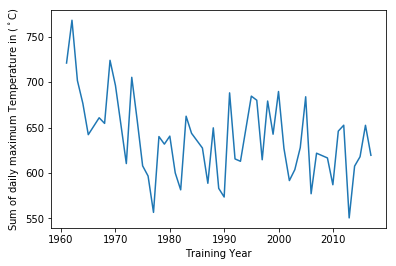

The 600 rule shoud not be used


In [36]:
##Problem 1-1
def isleapyear(year):
    if ((((year%4)==0) and ((year%100) != 0)) or ((year%400) ==0)):
        return True
    else:
        return False
         

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

tyear=[]

j=31
summaxtemp=[] #array containing the summation of daily max temmp until bloom date of the training years


for i in range(1961,2018):
    
    #Skipping the test years
    if i in [1966,1971,1985,1994,2008]:
        if isleapyear(i):
            j=j+366
        else:
            j=j+365
        continue
        
        
    #locating the bloom date of a particular training year
    bdi=df.loc[(df['year'] == i) & df['bloom'].isin([1])].index.tolist()
    tsum=0
    k=j
    
    #Summing the daily max temperature until bloom date of a training year
    while k<=bdi[0]:
        tsum=tsum+df.iloc[k,10]
        k=k+1
        tsum
    summaxtemp.append(tsum)

    if isleapyear(i):
        j=j+366
    else:
        j=j+365
    tyear.append(i)
    
    

meansummaxtemp=np.mean(summaxtemp)
print('The claculated Tmean is {} \N{DEGREE SIGN}C'.format(meansummaxtemp))
plt.plot(tyear,summaxtemp) 
plt.ylabel("Sum of daily maximum Temperature in ($^\circ$C)")
plt.xlabel("Training Year")
plt.show()


if meansummaxtemp==600:
    print("The 600 rule should be used")
else:
    print("The 600 rule shoud not be used")

### Problem 1-2: (10pts)

Use the average accumulated value $T_{mean}$ calculated in 1-1 to predict $BD_{j}$ for each test year, and show the error from the actual $BD_{j}$. Compare to the prediction results when 600$^\circ$C is used a threshold value, and evaluate both models using the coefficient of determination ($R^2$ score).

In [54]:
#problem 1-2
pbd=[]
abd=[]
for i in [1966,1971,1985,1994,2008]:
    df2=df.loc[df['year'] == i]
    df2.index=range(len(df2))
    j=31
    tsum=0
    bdi=df2.loc[df2['bloom'].isin([1])].index.tolist()
    abd.append(bdi[0]+1)
    while tsum<=meansummaxtemp:
        tsum=tsum+df2.iloc[j,10]
        j=j+1
    pbd.append(j)
    
print('The actual bloom dates extracted from the data are',abd)
print('The predicted Bloom Dates values using Tmean',pbd)

#calculating R^2 value
rscoremean=metrics.r2_score(abd,pbd)
print('The R\u00b2 value using Tmean is:',rscoremean)

#Using the 600 rule
pbd600=[]
abd=[]
for i in [1966,1971,1985,1994,2008]:
    df2=df.loc[df['year'] == i]
    df2.index=range(len(df2))
    j=31
    tsum=0
    bdi=df2.loc[df2['bloom'].isin([1])].index.tolist()
    abd.append(bdi[0]+1)
    while tsum<=600:
        tsum=tsum+df2.iloc[j,10]
        j=j+1
    pbd600.append(j)
print('The predicted Bloom Dates values using 600\N{DEGREE SIGN}C ',pbd600)


#calculating R^2 value
rscore600=metrics.r2_score(abd,pbd600)
print('The R\u00b2 value using 600\N{DEGREE SIGN}C rule is:',rscore600)

The actual bloom dates extracted from the data are [79, 89, 93, 90, 82]
The predicted Bloom Dates values using Tmean [82, 88, 91, 90, 85]
The R² value using Tmean is: 0.832361516035
The predicted Bloom Dates values using 600°C  [79, 86, 88, 87, 83]
The R² value using 600°C rule is: 0.679300291545


***
## 2. Linear Regression Model: Transform to Standard Temperature (30pts total)

The year to year fluctuation of the bloom-date depends heavily upon the actual temperature fluctuation (not just the accumulated maximum). In order to get to a more physiologically realistic metric,  Sugihara et al. (1986) considered the actual effect of temperature on biochemical activity. They introduced a method of "standardizing" the temperatures measured, according to the fluctuation relative to a standard temperature.

In order to make such a standardization, we apply two major assumptions, outlined below.

#### 1) The Arrhenius equation: <br>

The first assumption, also known in thermodynamics as the "Arrhenius equation", deals with chemical reaction rates and can be written as follows:

$$
k = A \exp{ \Bigl(- \frac{E_{a}}{RT}} \Bigr)
$$ <br>

Basically, it says that each reaction has an activation energy, $E_{a}$ and a pre-exponential factor $A$. Knowing these values for the particular equation, we can find the rate constant $k$ if we know the temperature, $T$, and applying the universal gas constant, $R = 8.314 \rm [J/K・mol]$.

#### 2) Constant output at constant temperature: <br>

The second assumption, is simply that the output of a reaction is a simple product of the duration and the rate constant $k$, and that product is constant even at different temperatures.
    
$$
tk = t'k' = t''k'' = \cdots = \rm{const}
$$ <br>


Making the assumptions above, we can determine a "standard reaction time", $t_{s}$ required for the bloom-date to occur. We can do so in the following way:

<br>
$$
t_{s} = \exp \Bigl( \frac{E_{a}(T_{i, j} - T_{s})}{RT_{i, j}T_{s}}\Bigr)
$$ <br>

We define $T_{i, j}$ as the daily average temperature, and use a standard temperature of $T_{s} = 17^\circ\rm{C}$. For a given year $j$, with the last day of the hibernation phase set as $D_ {j}$, we define the number of "transformed temperature days",  $DTS_{ J}$,  needed to reach from $D_ {j}$ to the bloom-date $BD_{j}$ with the following equation:


<br>
$$
DTS_{j} = \sum_{i=D_{j}}^{BD_{j}} t_{s} = \sum_{i=D_{j}}^{BD_{j}} \exp \Bigl( \frac{E_{a}(T_{i, j} - T_{s})}{RT_{i, j}T_{s}}\Bigr)
$$ <br>



From that equation, we can find the average $DTS$ for $x$ number of years ($DTS_{ mean}$) as follows: 

<br>
$$
\begin{align}
DTS_{\rm{mean}} &= \frac{1}{x} \sum_{j}^{x} DTS_{j} \\
&= \frac{1}{x} \sum_{j}^{x} \sum_{i=D_{j}}^{BD_{j}} \exp \Bigl( \frac{E_{a}(T_{i, j} - T_{s})}{RT_{i, j}T_{s}}\Bigr)
\end{align}
$$ <br> <br>

In this exercise, we assume that $DTS_{ mean}$ and $E_{ a}$ are constant values, and we use the data from the training years to fit these 2 constants. The exercise consists of 4 steps:
1. Calculate the last day of the hibernation phase $D_ {j}$ for every year $j$.
2. For every year $j$, calculate $DTS_{ j}$ as a function of $E_{ a}$, then calculate the average (over training years) $DTS_{ mean}$ also as a function of $E_{ a}$.
3. For every year $j$, and for every value of $E_{ a}$, accumulate $t_{s}$ from $D_ {j}$ and predict the bloom date $BD_{j}^{\rm{pred}}$ as the day the accumulated value surpasses $DTS_{ mean}$. Calculate the bloom date prediction error as a function of $E_{ a}$, and find the optimal $E_{ a}$ value that minimizes that error.
4. Use the previously calculated values of $D_ {j}$, $DTS_{ mean}$, and $E_{ a}$ to predict bloom-day on years from the test set.


### Problem 2-1: (5pts)
According to Hayashi et al. (2012), the day on which the sakura will awaken from their hibernation phase, $D_{j}$, for a given location, can be approximated by the following equation:
<br> <br>
$$
D_{j} = 136.75 - 7.689 \phi + 0.133 \phi^{2} -1.307\ln L + 0.144T_{F} + 0.285T_{F}^2
$$ <br>

where $\phi$ is the latitude [°N], $L$ is the distance from the nearest coastline [km], and $T_{F}$ is that location's average temperature [°C] over the first 3 months of a given year. In the case of Tokyo, $\phi = 35°40'$ and $L=4\rm{km}$.

Find the $D_{j}$ value for every year $j$ from 1961 to 2017 (including the test years), and plot this value on a graph. 

(In Problem 1, we had assumed a $D_j$ of February 1st.)

The calculated Dj s are: [39, 42, 38, 40, 39, 45, 42, 43, 43, 39, 43, 45, 45, 40, 41, 45, 41, 42, 51, 42, 42, 45, 45, 36, 41, 39, 46, 45, 51, 48, 47, 48, 47, 44, 46, 45, 50, 47, 49, 48, 45, 56, 44, 50, 45, 46, 55, 47, 50, 47, 44, 42, 49, 47, 46, 48, 45]


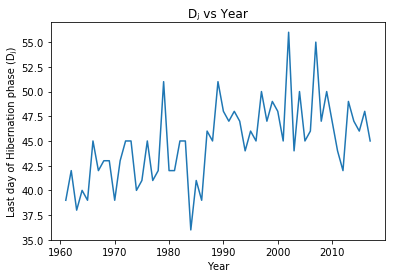

In [1]:
#Problem 2-1
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from sklearn import metrics
df=pd.read_csv("modified tokyo.csv")
D=[]
year=[i for i in range(1961,2018)]

for i in range(1961,2018):
    df2=df.loc[df['year'] == i]
    df2.index=range(len(df2))
    tf=0
    for j in range(90):
        tf=tf+df2.iloc[j,9]
    tf=tf/90
    fi=35.67
    L=4
    Dj=136.75-(7.689*fi)+(0.133*fi**2)-1.307*mt.log(L)+0.144*tf+0.285*tf**2
    D.append(Dj)
    
D=[int(round(i)) for i in D]
print("The calculated Dj s are:",D)
plt.plot(year,D) 
plt.ylabel("Last day of Hibernation phase (D\u2C7C)")
plt.xlabel("Year")
plt.title("D\u2C7C vs Year")
plt.show()

### Problem 2-2: (10pts)
Calcluate $DTS_j$ for each year $j$ in the training set for discrete values of $E_{a}$, varying from 5 to 40kcal ($E_{a} = 5, 6, 7, \cdots, 40 \,\rm{kcal}$), and plot this $DTS_j$ against $E_{a}$. Also calculate the average of $DTS_{j}$ over the training period, and indicate it on the plot as $DTS_{mean}$. Pay attention to the units of **every parameter** ($T_{i,j}$, $E_{a}$, ...) in the equation for $t_{s}$. 


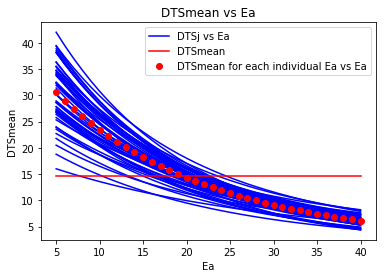

In [11]:
Ts=(17+273)
DTS=[]
for i in range(1961,2018):
    DTS.append([])
    if i in [1965,1971,1985,1984,2012]:
        DTS[i-1961].append([])
        continue
    
    df2=df.loc[df['year'] == i]
    df2.index=range(len(df2))
    bdi=df2.loc[df2['bloom'].isin([1])].index.tolist()
    for j in range(5,41):
        E=j*4184
        dts=0
        for k in range(D[i-1961],bdi[0]+1):
            T=(df2.iloc[k,9])+273
            dts=dts+np.exp((E*(T-Ts))/(8.314*T*Ts))
        DTS[i-1961].append(dts)
 
DTSmean=[]
for i in range(36):
    mean=0
    for j in range(1961,2018):
        if j in [1965,1971,1985,1984,2012]:
            continue
        mean=mean+DTS[j-1961][i]
    mean=mean/52
    DTSmean.append(mean)


E=[E for E in range(5,41)]
for i in range (1961,2018):
    if i in [1965,1971,1985,1984,2012]:
        continue
    b=DTS[i-1961]
    plt.plot(E,b,'b-')
    
plt.plot(E,DTS[0],'b-',label='DTSj vs Ea')
  
DTSmeanavg = np.mean(DTSmean)
DTSavgmean = np.ones(len(E)) * DTSmeanavg
plt.plot(E, DTSavgmean, 'r', label='DTSmean')

plt.plot(E,DTSmean, 'ro', label='DTSmean for each individual Ea vs Ea')
plt.ylabel("DTSmean")
plt.xlabel("Ea")
plt.title("DTSmean vs Ea")
plt.legend()
plt.show()   



### Problem 2-3: (11pts)
Using the same $E_{a}$ values and calculated $DTS_{mean}$ from 2-2, predict the bloom date $BD_{j}$ for each of the training years. Find the mean squared error relative to the actual $BD$ and plot it against $E_{a}$. Find the optimal $E_{a}^{*}$ that minimizes that error on the training data.

The value of Ts is 290 Kelvin
The minimum mean square error is obtained for Ea: 23


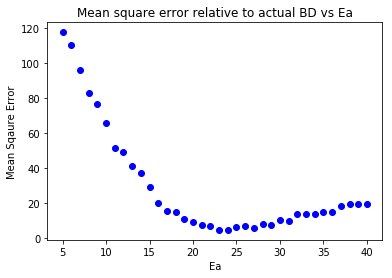

In [12]:
meansquareerror=[]
print('The value of Ts is {} Kelvin'.format(Ts))
for i in range(5,41):
    squareerror=0
    Ea=i*4184
    
    for j in [1965,1971,1985,1984,2012]:
        df2=df.loc[df['year'] == j]
        df2.index=range(len(df2))
        Dj=D[j-1961]
        d=Dj-1
        dts=0
        while dts<=(DTSmean[i-5]) :
            T=(df2.iloc[d,9])+273
            dts=dts+np.exp((Ea*(T-Ts))/(8.314*T*Ts))
            d=d+1
        pbd=d+1
        abd=(df2.loc[df2['bloom'].isin([1])].index.tolist()[0])+1
        
        squareerror=squareerror+(abd-pbd)**2
        
    squareerror=squareerror/5
    meansquareerror.append(squareerror)
print("The minimum mean square error is obtained for Ea:", E[meansquareerror.index(min(meansquareerror))])

plt.plot(E,meansquareerror, 'bo')
plt.ylabel("Mean Sqaure Error")
plt.xlabel("Ea")
plt.title('Mean square error relative to actual BD vs Ea')
plt.show()

### Problem 2-4: (4pts)

Using the $D_j$ dates from problem 2-1, the average $DTS_{mean}$ from 2-2, and the best-fit $E_{a}^{*}$ from 2-3, predict the bloom-dates $BD_j$ for the years in the test set. Determine the error between your predicted $BD_j$ values and the actual values, and evaluate this model using the coefficient of determination ($R^2$ score).

In [14]:
print("The calculated DTSmean for Ea=28 is:", DTSmean[23-5])
abd=[]
pbddts=[]
error=[]
Ea=23*4184
for i in [1965,1971,1985,1984,2012]:
    Dj=D[i-1961]
    d=Dj-1
    df2=df.loc[df['year'] == i]
    df2.index=range(len(df2))
    dts=0
    while dts<=(DTSmean[23-5]) :
        T=(df2.iloc[d,9])+273
        dts=dts+np.exp((Ea*(T-Ts))/(8.314*T*Ts))
        d=d+1
    pbddts.append(d+1)
    bdi=df2.loc[df2['bloom'].isin([1])].index.tolist()
    abd.append(bdi[0]+1)
    error.append(bdi[0]-d)
print("The errors are:", error)
rscore_linear_regression=metrics.r2_score(abd,pbddts)
print("The R\u00b2 score using Ea=28 kcal and corresponding Dj and DTSmean",rscore_linear_regression) 

The calculated DTSmean for Ea=28 is: 12.4590289185
The errors are: [-2, 1, 3, 3, 1]
The R² score using Ea=28 kcal and corresponding Dj and DTSmean 0.762845849802


### Problem 2-5: (extra 10pts)
Discuss any improvements you could make to the model outlined above. If you have a suggestion in particular, describe it. How much do you think the accuracy would be improved?

***
## 3. Predicting Bloom-date via Neural Network (30pts total)

### Problem 3-1: (20pts)

Build a neural network and train it on the data from the training years. Use this model to predict the bloom-dates for each year in the test set. Evaluate the error between predicted dates and actual dates using the coefficient of determination (R2 score). Only use the weather data given in `tokyo.csv` and the sakura data acquired in problem 0-1.</br>
You may use whichever framework or strategy that you like to construct the network. 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
training=[]
test=[]
df=pd.read_csv("modified tokyo.csv")
k=0
m=0
for i in range(1961,2018):

    
    df2=df.loc[(df['year'] == i)]
    df2.index=range(len(df2))
    #Taking the first 110 days data of every year
    df2=df2.iloc[0:109,:]
    
    if i in [1966,1971,1985,1994,2008]:
        test.append([])
        #Taking same data like training set from the test years
        for j in [6,12]:
            test[k].append(df2.iloc[:,j].mean())
       
        for j in [9,14,13]:
            test[k].append(df2.iloc[:,j].sum())
        bdi=df2.loc[(df2['year'] == i) & df2['bloom'].isin([1])].index.tolist()
        test[k].append(bdi[0]+1)
        k+=1
        continue

    training.append([])
    #Assuming from domain knowledge Bloom dates depend on the average of some data such as total preci and avg humidity
    for j in [6,12]:
        training[m].append(df2.iloc[:,j].mean())
    #Assuming Bloom dates depends on the aggregate sum of some data such as daily avg. temperature, sum hours and min humidity
    for j in [9,14,13]:
        training[m].append(df2.iloc[:,j].sum())
    bdi=df2.loc[(df2['year'] == i) & df2['bloom'].isin([1])].index.tolist()
    training[m].append(bdi[0]+1)
    m+=1



X_train=np.array(training)[:,:5]
Y_train=np.array(training)[:,-1:].ravel()


X_test=np.array(test)[:,:5]
Y_test=np.array(test)[:,-1:].ravel()
print('The actual Bloom dates are',Y_test)

out=0
train_out=0
Y_pred=[0,0,0,0,0]
for i in range(50):
    clf=MLPRegressor(hidden_layer_sizes=(50,50),activation='relu', solver='lbfgs',max_iter=200)
    clf=clf.fit(X_train,Y_train)
    Y=clf.predict(X_test)
    Y_pred=[x + y for x, y in zip(Y_pred, Y)]
    out=out+clf.score(X_test,Y_test)
    train_out=train_out+clf.score(X_train,Y_train)  

Y_pred=[int(round(i/50)) for i in Y_pred]
print('The predicted bloom dates for test years ysing neural network are:',Y_pred)
print('The R\u00b2 value using two hidden layer neural network is:',metrics.r2_score(Y_test,Y_pred))

The actual Bloom dates are [ 79.  89.  93.  90.  82.]
The predicted bloom dates for test years ysing neural network are: [83, 89, 92, 88, 81]
The R² value using two layer neaural network is: 0.839650145773


### Problem 3-2: (10pts)
Compare the performance (via $R^2$ score) of the 3 implementations above: the 600 Degree Rule, the DTS method, and the neural network approach. For all methods, and each test year, plot the predicted date vs. the actual date. Discuss the accuracy and differences of these 3 models.

The R² value using 600°C rule is: 0.679300291545
The R² score using Ea=28 kcal and corresponding Dj and DTSmean 0.97084548105
The R² value using two hidden layer neural network is: 0.839650145773


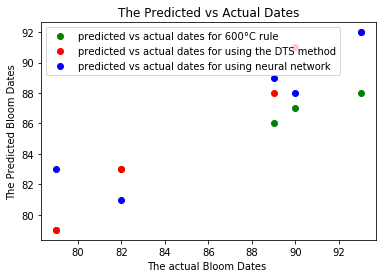

In [62]:
#Bringing data from above code
print('The R\u00b2 value using 600\N{DEGREE SIGN}C rule is:',rscore600)
print("The R\u00b2 score using Ea=28 kcal and corresponding Dj and DTSmean",rscore_linear_regression) 
print('The R\u00b2 value using two hidden layer neural network is:',metrics.r2_score(Y_test,Y_pred))
#Plotting the predicted boom date vd actual date (given in no of days starting from januar 1st) for each test year  
plt.plot(abd,pbd600,'go', label='predicted vs actual dates for 600\N{DEGREE SIGN}C rule')
plt.plot(abd,pbddts,'ro', label='predicted vs actual dates for using the DTS method')
plt.plot(abd,Y_pred,'bo', label='predicted vs actual dates for using neural network')
plt.ylabel("The Predicted Bloom Dates")
plt.xlabel("The actual Bloom Dates ")
plt.title('The Predicted vs Actual Dates')
plt.legend()
plt.show()


***
## 4. Trends of the Sakura blooming phenomenon (20pts total)

### Problem 4-1: (20pts)
Based on the data from the past 60 years, investigate and discuss trends in the sakura hibernation ($D_{j}$) and blooming ($BD_{j}$) phenomena in Tokyo.

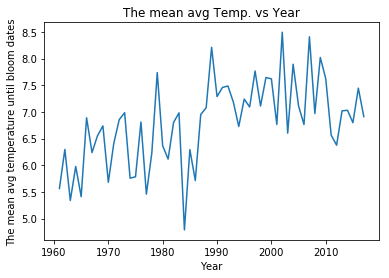

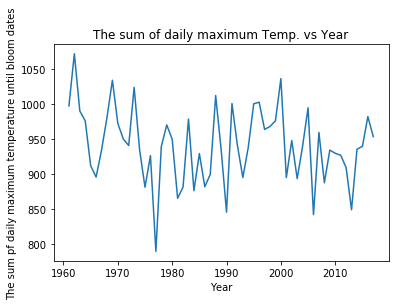

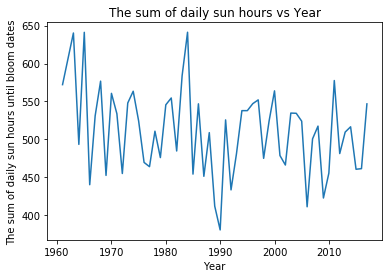

In [63]:
#Problem 4-1
#In this problem we observe the 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=[]
year=[i for i in range(1961,2018)]
df=pd.read_csv("modified tokyo.csv")
k=0
m=0
for i in range(1961,2018):

    bdi=df.loc[(df['year'] == i) & df['bloom'].isin([1])].index.tolist()
    df2=df.loc[(df['year'] == i) & (df['serial']<=bdi[0])]
    df2.index=range(len(df2))

    #data.append([df2.iloc[:,9].mean()][0])
    data.append([])
    for j in [9,12,13,4]:
        data[m].append(df2.iloc[:,j].mean())
    for j in [10,14]:
        data[m].append(df2.iloc[:,j].sum())
    data[m].append(len(df2))
    m+=1

plt.plot(year,np.array(data)[:,0])
plt.ylabel("The mean avg temperature until bloom dates")
plt.xlabel("Year")
plt.title('The mean avg Temp. vs Year')
plt.show()

plt.plot(year,np.array(data)[:,4])
plt.ylabel("The sum pf daily maximum temperature until bloom dates")
plt.xlabel("Year")
plt.title('The sum of daily maximum Temp. vs Year')
plt.show()

plt.plot(year,np.array(data)[:,5])
plt.ylabel("The sum of daily sun hours until bloom dates")
plt.xlabel("Year")
plt.title('The sum of daily sun hours vs Year')
plt.show()